# Bloch point

> Interactive online tutorial:
> [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ubermag/oommfc/master?filepath=docs%2Fipynb%2Findex.ipynb)

In [1]:
import oommfc as oc
import discretisedfield as df
%matplotlib inline

d = 150e-9
hb = 20e-9
ht = 10e-9
cell = (3e-9, 2e-9, 2e-9)
regions = {'r1': df.Region(p1=(-d/2, -d/2, -hb), p2=(d/2, d/2, 0)),
           'r2': df.Region(p1=(-d/2, -d/2, 0), p2=(d/2, d/2, ht))}
p1 = (-d/2, -d/2, -hb)
p2 = (d/2, d/2, ht)
mesh = oc.Mesh(p1=p1, p2=p2, cell=cell, regions=regions)

The mesh is

In [2]:
mesh.k3d()

Output()

In [3]:
mesh.k3d_regions()

Output()

In [4]:
D = {'r1': 1.58e-3, 'r2': -1.58e-3, 'r1:r2': 1.58e-9}
Ms = 3.84e5
A = 8.78e-12

def Ms_fun(pos):
    x, y, z = pos
    if x**2 + y**2 <= (d/2)**2:
        return Ms
    else:
        return 0

system = oc.System(name='bloch_point')
system.hamiltonian = oc.Exchange(A=A) + oc.DMI(D=D, crystalclass='T') + oc.Demag()
system.m = df.Field(mesh, dim=3, value=(0, 0, 1), norm=Ms_fun)

In [5]:
system.m.norm.k3d_nonzero()

Output()

The magnetisation, we set is

In [6]:
system.m.plane('y').k3d_vectors(color_field=system.m.z, head_size=10)

Output()

Now, we can minimise the system's energy by using `oommfc.MinDriver`.

In [7]:
md = oc.MinDriver()
md.drive(system)

2019/08/20 14:59: Running OOMMF (bloch_point.mif) ... (7.1 s)


In [8]:
system.m.z.k3d_voxels(norm_field=system.m.norm)

Output()

In [9]:
system.m.plane(z=-10e-9, n=(20, 20)).k3d_vectors(color_field=system.m.z, head_size=30)

Output()

In [10]:
system.m.plane(z=5e-9, n=(20, 20)).k3d_vectors(color_field=system.m.z, head_size=30)

Output()

In [11]:
system.m.plane('y').k3d_vectors(color_field=system.m.z, head_size=10)

Output()

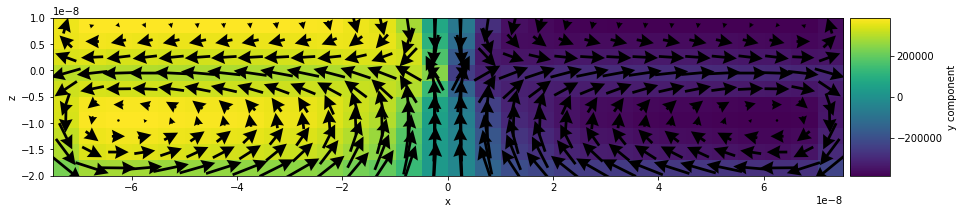

In [12]:
system.m.plane('y', n=(30, 10)).mpl(figsize=(15, 10))

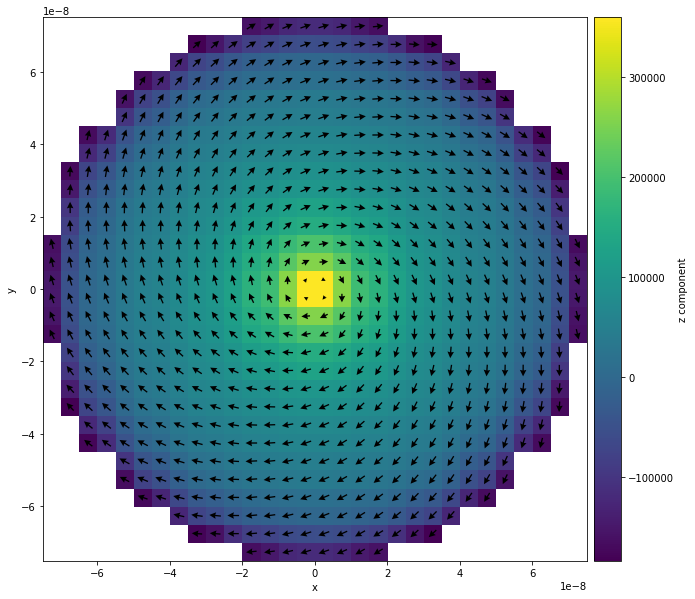

In [13]:
system.m.plane('z', n=(30, 30)).mpl(figsize=(15, 10))

In [14]:
system.delete()

## Other

More details on various functionality can be found in the [API Reference](https://oommfc.readthedocs.io/en/latest/).